In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

import report
import pbreport
import calibtools

%load_ext autoreload
%autoreload 2
%matplotlib inline

matplotlib.rcParams['font.size'] = 15
matplotlib.rcParams['figure.figsize']=(12,8)
matplotlib.rcParams['legend.fontsize']=20

In [2]:
AMAC='AMAC_B07'

In [3]:
r_amac=report.Report(AMAC)
r_pb=pbreport.Report('PB_'+AMAC)

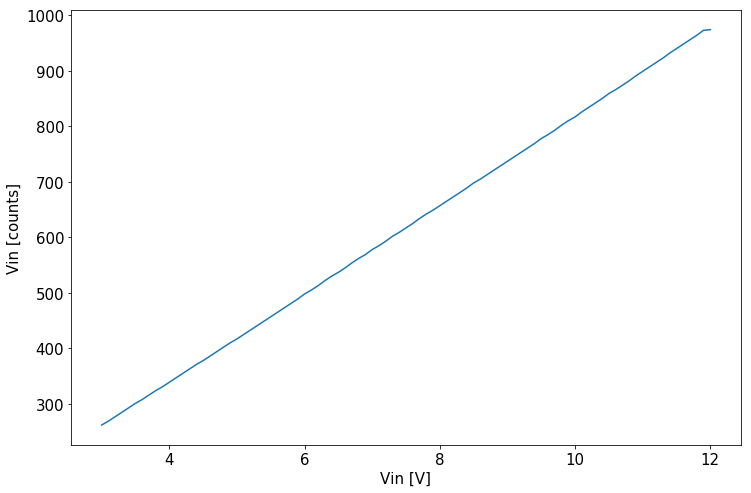

In [4]:
r_pb.render_vin()

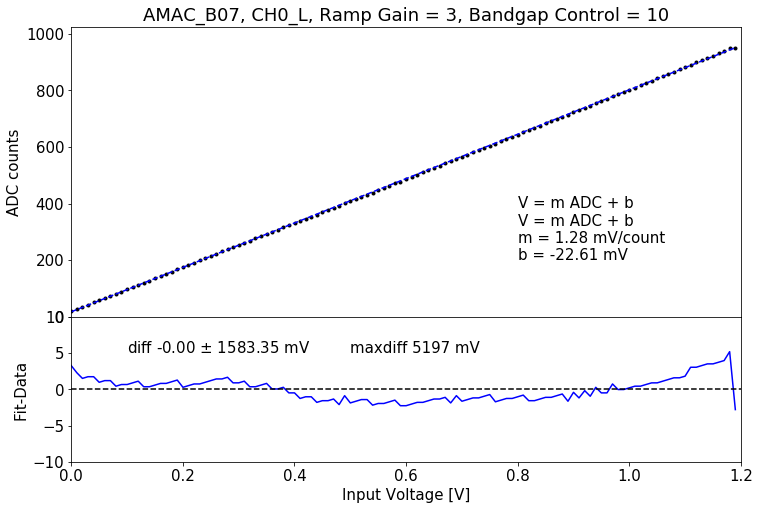

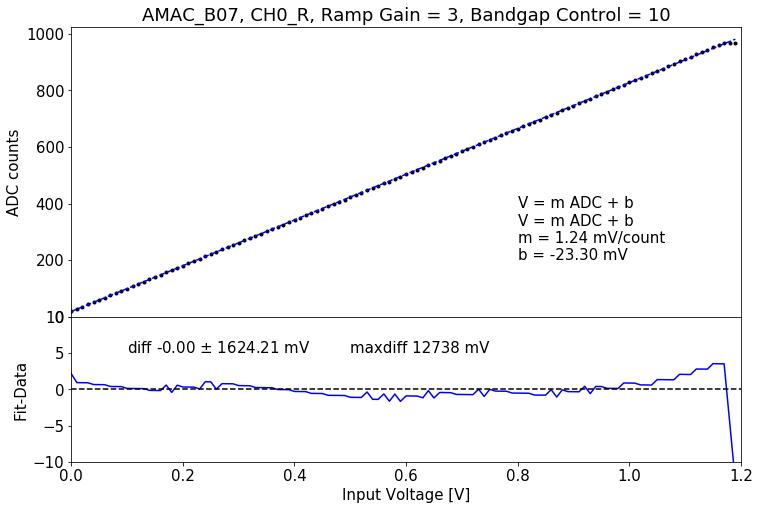

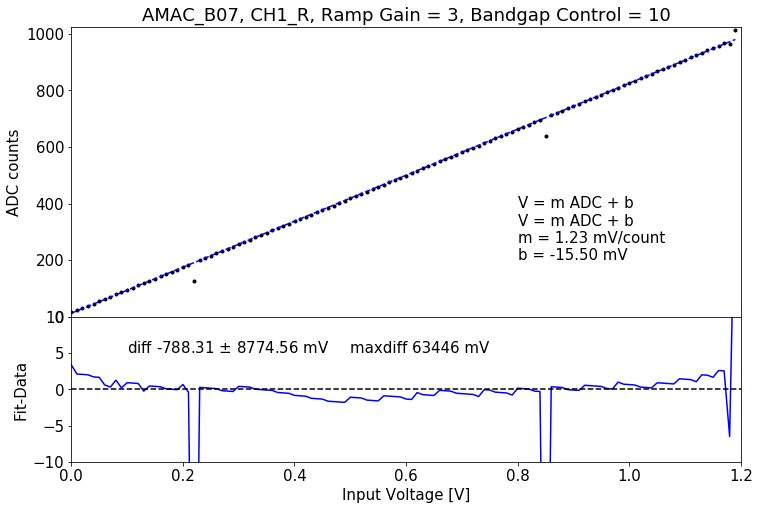

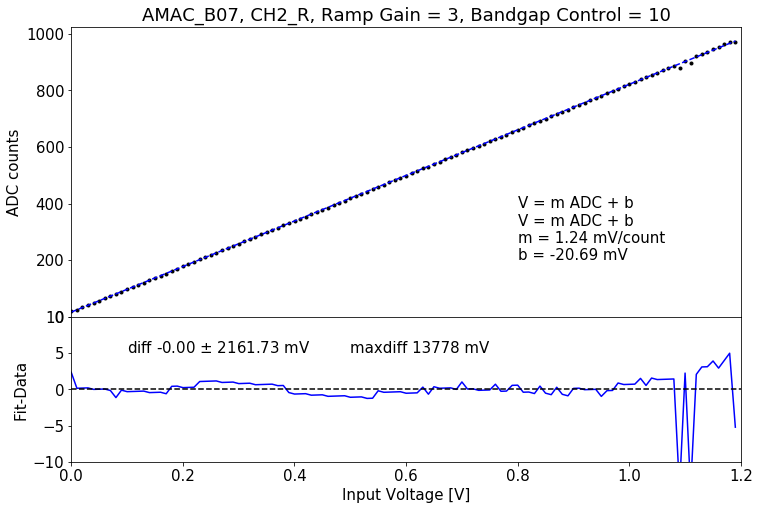

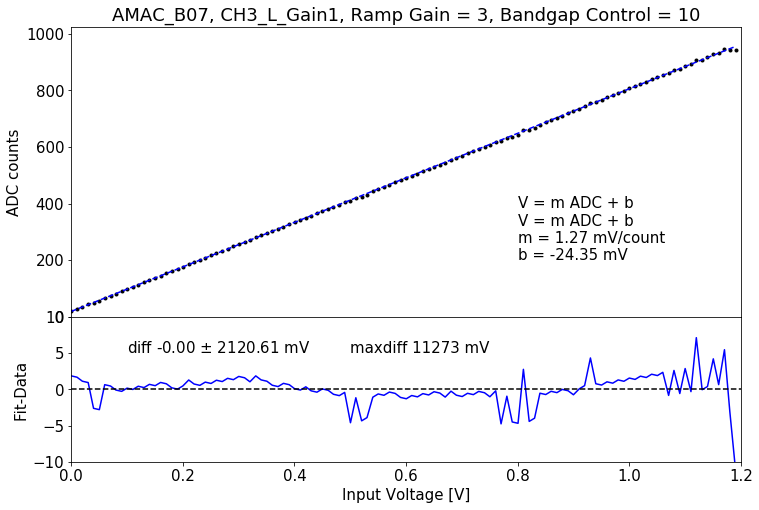

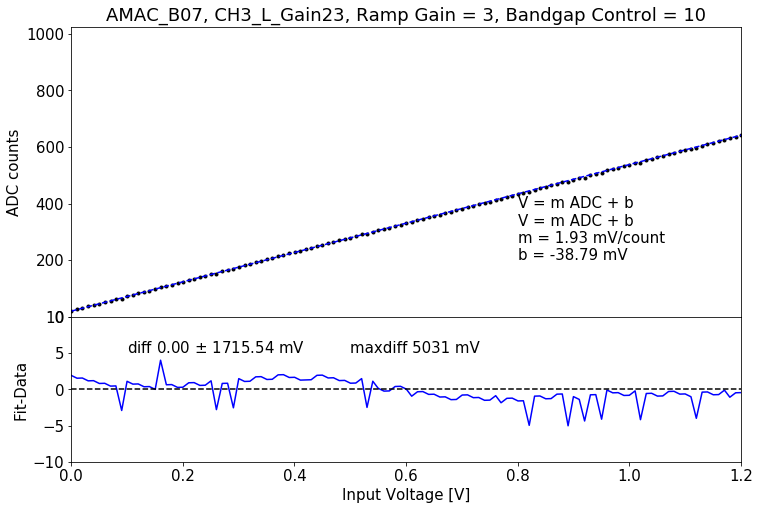

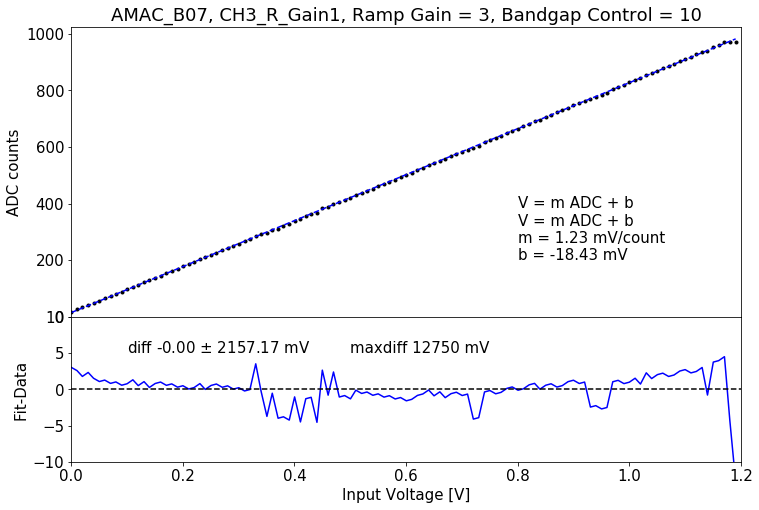

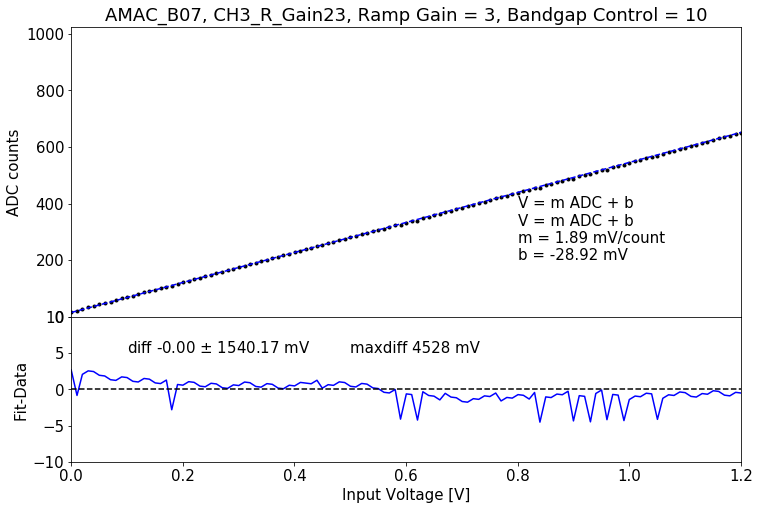

In [5]:
calib=calibtools.calibrate(r_amac.calib)
calibtools.plot_calibration(r_amac.calib,calib,None,10,3)

In [11]:
R20=90.9e3
R19=10e3
#Vdiv=10.17 #(R20+R19)/R19
Vdiv=(R20+R19)/R19
print('Vdiv=%f'%Vdiv)
VinAMAC=r_pb.vin.apply(lambda row: calibtools.convert(row.VinADC,calib,Channel='CH0_R',BG=10,RG=3)*Vdiv, axis=1)

Vdiv=10.090000


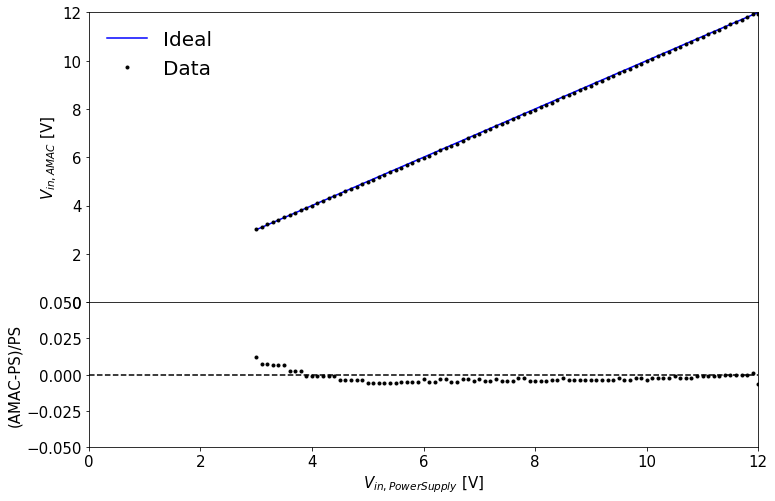

In [12]:
plt.subplots_adjust(hspace=0.,wspace=0.)

plt.subplot2grid((3,3), (0,0), rowspan=2, colspan=3)
plt.plot(r_pb.vin.Vin,r_pb.vin.Vin,'b-',label='Ideal')
plt.plot(r_pb.vin.Vin,VinAMAC,'k.',label='Data')
plt.xlabel('$V_{in,Power Supply}$ [V]')
plt.ylabel('$V_{in,AMAC}$ [V]')
plt.xlim(0,12)
plt.ylim(0,12)
plt.xticks([])
plt.legend(frameon=False)
#plt.title('%s, %s, Ramp Gain = %d, Bandgap Control = %d'%(amackey,chkey,RG,BG))

plt.subplot2grid((3,3), (2,0), rowspan=1, colspan=3)
resid=(VinAMAC-r_pb.vin.Vin)/r_pb.vin.Vin
plt.plot(r_pb.vin.Vin,resid,'.k')
plt.plot([0,12],[0,0],'--k')
plt.xlim(0,12)
plt.ylim(-0.05,0.05)
plt.ylabel('(AMAC-PS)/PS')
plt.xlabel('$V_{in,Power Supply}$ [V]')

plt.show()

0.00124127087791 -0.0237900839487


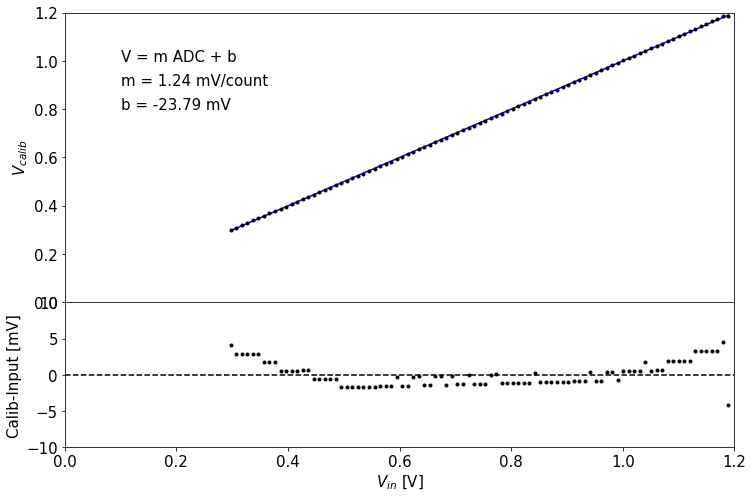

In [8]:
#
# Calibrate
x=r_pb.vin.VinADC[0:-5]
y=r_pb.vin.Vin[0:-5]/Vdiv
m,b=np.polyfit(x,y,1)
print(m,b)

thefit=(r_pb.vin.Vin/Vdiv-b)/m
Vcalib=r_pb.vin.VinADC*m+b

#
# Plot results
plt.subplots_adjust(hspace=0.,wspace=0.)

plt.subplot2grid((3,3), (0,0), rowspan=2, colspan=3)
plt.plot(r_pb.vin.Vin/Vdiv,r_pb.vin.Vin/Vdiv,'b-')
plt.plot(r_pb.vin.Vin/Vdiv,Vcalib,'k.')
plt.xlabel('$V_{in}$ [V]')
plt.ylabel('$V_{calib}$')
plt.xlim(0,1.2)
plt.ylim(0,1.2)
plt.xticks([])

plt.text(0.1,1,'V = m ADC + b')
plt.text(0.1,0.9,'m = %0.2f mV/count'%(m*1000))
plt.text(0.1,0.8,'b = %0.2f mV'%(b*1000))
#plt.title('%s, %s, Ramp Gain = %d, Bandgap Control = %d'%(amackey,chkey,RG,BG))

plt.subplot2grid((3,3), (2,0), rowspan=1, colspan=3)
resid=(Vcalib-r_pb.vin.Vin/Vdiv)*1000
plt.plot(r_pb.vin.Vin/Vdiv,resid,'.k')
plt.plot([0,1.2],[0,0],'--k')
plt.xlim(0,1.2)
plt.ylim(-10,10)
plt.ylabel('Calib-Input [mV]')
plt.xlabel('$V_{in}$ [V]')

plt.show()

In [9]:
idx=80

print(r_pb.vin.Vin[idx]/Vdiv)
print(r_pb.vin.VinADC[idx])
print(1.26*r_pb.vin.VinADC[idx]-34.89)
print(1.28*r_pb.vin.VinADC[idx]-25.64)
print(r_pb.vin.Vin[idx])
print(r_pb.vin.Vin[idx]-(1.26*r_pb.vin.VinADC[idx]-34.89)*Vdiv*1e-3)
print(r_pb.vin.Vin[idx]-(1.28*r_pb.vin.VinADC[idx]-25.64)*Vdiv*1e-3)

1.09018830525
899
1097.85
1125.08
11.0
-0.0773065
-0.3520572


In [10]:
r_pb.vin

,Vin,VinADC,PB
0,3.0,262,PB_AMAC_B07
1,3.1,269,PB_AMAC_B07
2,3.2,277,PB_AMAC_B07
3,3.3,285,PB_AMAC_B07
4,3.4,293,PB_AMAC_B07
5,3.5,301,PB_AMAC_B07
6,3.6,308,PB_AMAC_B07
7,3.7,316,PB_AMAC_B07
8,3.8,324,PB_AMAC_B07
9,3.9,331,PB_AMAC_B07
